# Zadanie 2

In [ ]:
library(glue)
library(dplyr)
library(readr)
library(ggthemes)
library(tidyr)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library(ggpubr)

In [ ]:
inflation_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
deposits_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

In [ ]:
head(inflation_data)

In [ ]:
head(deposits_data)

In [ ]:
eurozone_countries_inflation_tidy <- inflation_data |> pivot_longer(-Period, names_to = "country", values_to = "inflation")

In [ ]:
eurozone_countries_inflation_tidy

In [ ]:
inflation_data$Period <- as.Date(inflation_data$Period, format = "%d/%m/%Y")
deposits_data$Period <- as.Date(deposits_data$Period, format = "%d/%m/%Y")

In [ ]:
deposits_data[, 2:34] <- sapply(deposits_data[, 2:34], as.numeric)
# str(deposits_data)

In [ ]:
eurozone_countries_inflation <- select(inflation_data, matches("Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
other_countries_inflation <- select(inflation_data, !matches("EU|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
# EU_countries_inflation <- select(inflation_data, matches("Period|EU"))
# Poland_inflation <- select(inflation_data, matches("Period|Poland"))

In [ ]:
head(eurozone_countries_inflation)

In [ ]:
eurozone_countries_inflation_avg <- data.frame(eurozone_countries_inflation[1], (rowMeans(eurozone_countries_inflation[2:20], na.rm=TRUE)))
other_countries_inflation_avg <- data.frame(other_countries_inflation[1], (rowMeans(other_countries_inflation[2:9], na.rm=TRUE)))
EU_countries_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("EU")))
Poland_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("Poland")))

In [ ]:
inflation_avg <- data.frame(eurozone_countries_inflation[1], eurozone_countries_inflation_avg[2], other_countries_inflation_avg[2], EU_countries_inflation[2], Poland_inflation[2])

colnames(inflation_avg)[1] <- "Period"
colnames(inflation_avg)[2] <- "Eurozone"
colnames(inflation_avg)[3] <- "Other"
colnames(inflation_avg)[4] <- "EU"
colnames(inflation_avg)[5] <- "Poland"

In [ ]:
# January 2018 - October 2022
n_months = 58

In [ ]:
copy_inf = subset(inflation_data, select=c(Period))[c(2:n_months),]

In [ ]:
inflation_from2018 = subset(inflation_data, select=-c(EU..changing.composition.))[c(2:n_months),]
inflation_from2018['average'] = rowMeans(inflation_from2018[2:28], na.rm=TRUE)

In [ ]:
deposits_from2018 = subset(deposits_data, select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas))[c(1:(n_months-1)),]
deposits_from2018['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [ ]:
inf_cols = colnames(subset(inflation_data, select=-c(Period, EU..changing.composition.)))

In [ ]:
dep_cols = colnames(subset(deposits_data[2:34], select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas)))

In [ ]:
inf_cols

In [ ]:
dep_cols

In [ ]:
deposits_to_inflation <- data.frame(copy_inf)
for (i in 1:length(dep_cols)){
    col_inf <- inf_cols[i]
    col_dep <- dep_cols[i]
    new_column = deposits_from2018[col_dep] / ( inflation_from2018[col_inf] + 0.01)
    deposits_to_inflation[col_inf] = new_column
}
names(deposits_to_inflation)[names(deposits_to_inflation) == "copy_inf"] <- "Period"
# deposits_to_inflation[Period] = periods_from2018
deposits_to_inflation['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [ ]:
# eurozone
deposits_to_inflation['average_eurozone'] = 
rowMeans(select(deposits_to_inflation, matches(
    "Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia")), na.rm=TRUE)

In [ ]:
# and non-eurozone
deposits_to_inflation['average_not_eurozone'] = 
rowMeans(select(deposits_to_inflation, !matches(
    "Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia|average|average_eurozone")), na.rm=TRUE)

In [ ]:
country1 = 'Poland'
country2 = 'France'
country3 = 'Hungary'
country4 = 'Slovakia'

In [ ]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

In [ ]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
geom_line(aes(x = Period, y = average_eurozone), color="#0072BD", size=1) +
geom_line(aes(x = Period, y = average_not_eurozone), color="#00FF00", size=1) +
geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

In [ ]:
plot <- function(dataset, x_axis, y1, y2, y3, y4, y5, y_lab, title) {
  ggplot(data = dataset) +
    geom_line(aes(x = x_axis, y = y1), colour="#FF0000", size=1) +
    geom_line(aes(x = x_axis, y = y2), color="#0072BD", size=1) +
    geom_line(aes(x = x_axis, y = y3), color="#00FF00", size=1) +
    geom_line(aes(x = x_axis, y = y4), color="#000000", size=1) +
    geom_line(aes(x = x_axis, y = y5), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    scale_x_date(date_labels = "%b-%Y") +
    labs(x = "Date",
        y = y_lab, 
        title = title)
}

In [ ]:
plot(deposits_to_inflation, deposits_to_inflation$Period, deposits_to_inflation$Poland, deposits_to_inflation$France, 
     deposits_to_inflation$Hungary, deposits_to_inflation$Romania, deposits_to_inflation$average, "Deposits/Inflation", "Deposits/Inflation in chosen countries")

In [ ]:
plot(inflation_from2018, inflation_from2018$Period, inflation_from2018$Poland, inflation_from2018$France, 
     inflation_from2018$Hungary, inflation_from2018$Romania, inflation_from2018$average, "Inflation", "Inflation in chosen countries")

In [ ]:
plot(deposits_from2018, deposits_from2018$Period, deposits_from2018$Poland, deposits_from2018$France, 
     deposits_from2018$Hungary, deposits_from2018$Romania, deposits_from2018$average, "Deposits", "Deposits in chosen countries")

In [ ]:
# Creating ranges of intervals
before_pandemic <- as.Date("01/01/2018", "%d/%m/%Y")
pandemic <- as.Date("01/03/2020", "%d/%m/%Y")
before_war <- as.Date("01/02/2021", "%d/%m/%Y")
war <- as.Date("01/02/2022", "%d/%m/%Y")
now <- as.Date("01/09/2022", "%d/%m/%Y")

In [ ]:
# Split data to intervals
before_pandemic_data <- deposits_to_inflation %>% filter(Period >= before_pandemic & Period < pandemic)
pandemic_data <- deposits_to_inflation %>% filter(Period >= pandemic & Period < before_war)
before_war_data <- deposits_to_inflation %>% filter(Period >= before_war & Period < war)
war_data <- deposits_to_inflation %>% filter(Period >= war & Period <= now)

In [ ]:
# before pandemic
plot(before_pandemic_data, before_pandemic_data$Period, before_pandemic_data$Poland, before_pandemic_data$France, 
     before_pandemic_data$Hungary, before_pandemic_data$Romania, before_pandemic_data$average, "Deposits/Inflation", "Before pandemic")

In [ ]:
# during pandemic
plot(pandemic_data, pandemic_data$Period, pandemic_data$Poland, pandemic_data$France, 
     pandemic_data$Hungary, pandemic_data$Romania, pandemic_data$average, "Deposits/Inflation", "During pandemic")

In [ ]:
plot(before_war_data, before_war_data$Period, before_war_data$Poland, before_war_data$France, 
     before_war_data$Hungary, before_war_data$Romania, before_war_data$average, "Deposits/Inflation", "Year before war started")

In [ ]:
plot(war_data, war_data$Period, war_data$Poland, war_data$France, war_data$Hungary, war_data$Romania, war_data$average, "Deposits/Inflation", "After war started")

# Tidy

In [ ]:
deposits_to_inflation_tidy = deposits_to_inflation |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
# sort by countries
deposits_to_inflation_tidy = arrange(deposits_to_inflation_tidy, country, Period)

In [ ]:
head(deposits_to_inflation_tidy)

In [ ]:
before_pandemic_data_tidy <- before_pandemic_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
pandemic_data_tidy <- pandemic_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
before_war_data_tidy <- before_war_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
war_data_tidy <- war_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")

In [ ]:
options(warn=-1)

In [ ]:
plot <- function(data, title, countries) {
  data |>
    ggplot(aes(x=Period, y=coefficient, group=country, color=country)) +
    scale_color_viridis(discrete = TRUE, labels = countries) +
    geom_line(size=1) +
    guides(fill=guide_legend(title=NULL)) +
    xlab("Data") + ylab("Współczynnik") +
    ggtitle(title) +
    theme_ipsum() +
    scale_x_date(date_labels = "%b-%Y") +
    theme(
      legend.title = element_blank(),
      plot.title = element_text(size=18),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
        text=element_text(family="CM Roman")
    )
}

In [ ]:
# ggplot(data = deposits_to_inflation) +
#   geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
#   theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
#   labs(x = "Date",
#        y = "Deposits/Inflation",
#        title = "Deposits/Inflation in Poland")

In [ ]:
countries = c( 'average', 'France', 'Greece', 'Hungary', 'Poland')

In [ ]:
picks_overall_tidy = filter(deposits_to_inflation_tidy, country %in% countries)
picks_before_pandemic_data_tidy = filter(before_pandemic_data_tidy, country %in% countries)
picks_pandemic_data_tidy = filter(pandemic_data_tidy, country %in% countries)
picks_before_war_data_tidy = filter(before_war_data_tidy, country %in% countries)
picks_war_data_tidy = filter(war_data_tidy, country %in% countries)

In [ ]:
plot(picks_war_data_tidy, "Ostatnio", countries)

In [ ]:
plot(picks_war_data_tidy, "Ostatnio", countries)

In [ ]:
plot(picks_overall_tidy, "Cały okres", countries)

In [ ]:
plot(picks_overall_tidy, "Cały okres", countries)

In [ ]:
plot(picks_before_pandemic_data_tidy, "Wybrane kraje przed pandemią", countries)

In [ ]:
plot(picks_pandemic_data_tidy, "Wybrane kraje w trakcie pandemii", countries)

In [ ]:
plot(picks_before_war_data_tidy, "Rok przed wojną", countries)

In [ ]:
plot(picks_war_data_tidy, "Ostatnio", countries)

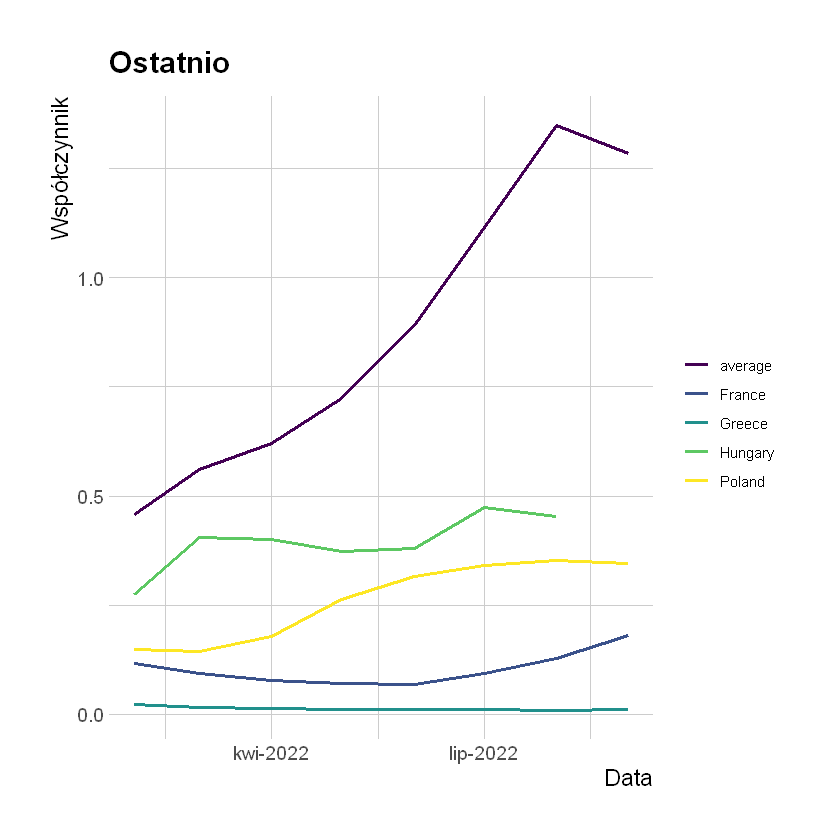

In [46]:
plot(picks_war_data_tidy, "Ostatnio", countries)

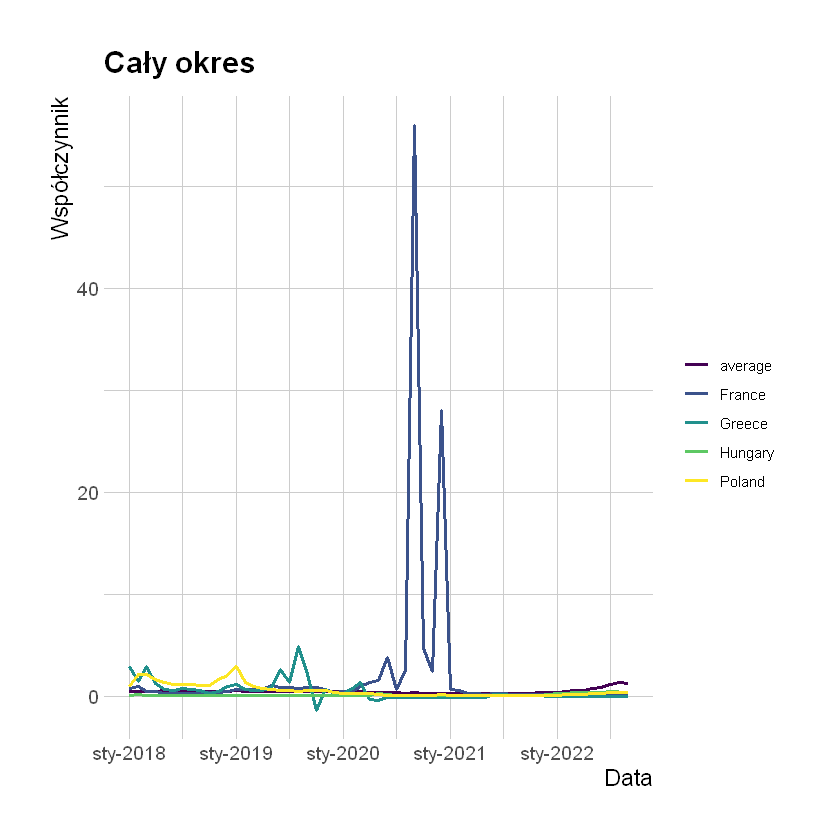

In [47]:
plot(picks_overall_tidy, "Cały okres", countries)

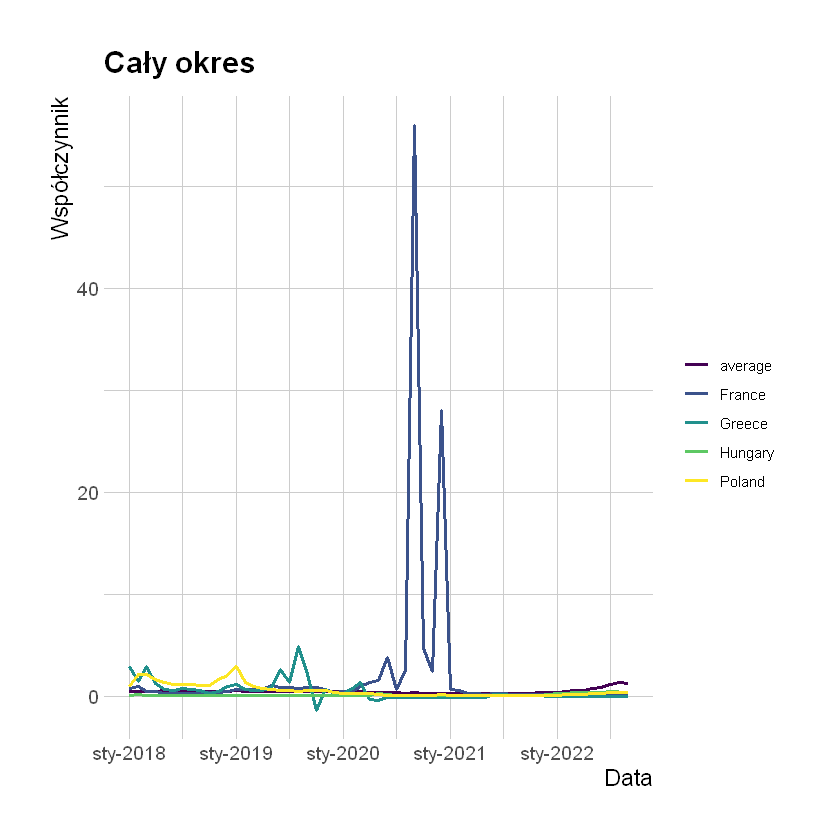

In [48]:
plot(picks_overall_tidy, "Cały okres", countries)

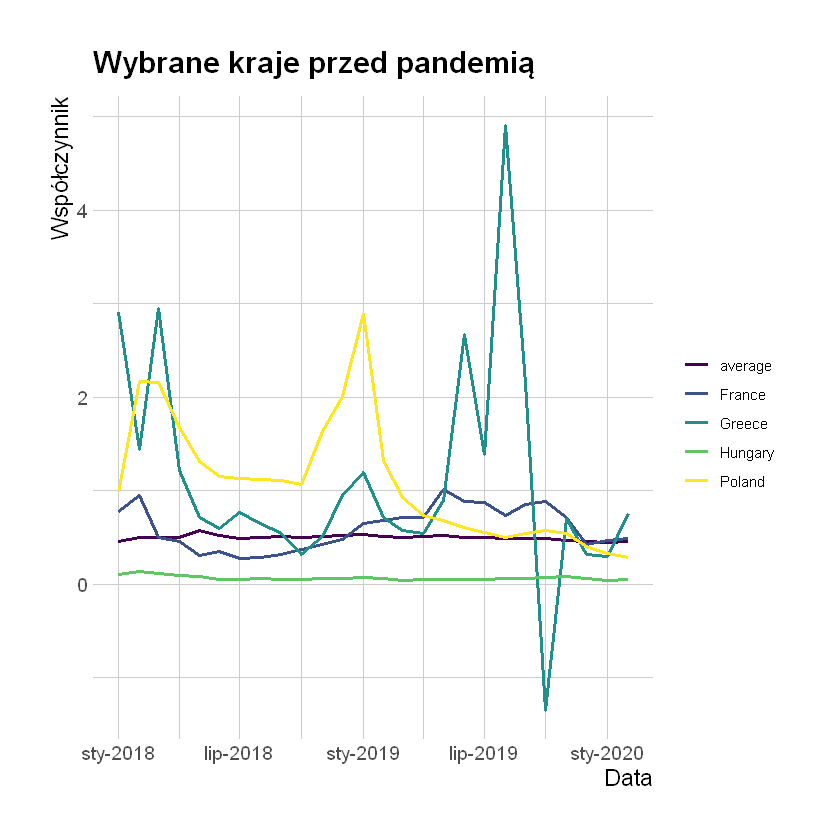

In [49]:
plot(picks_before_pandemic_data_tidy, "Wybrane kraje przed pandemią", countries)

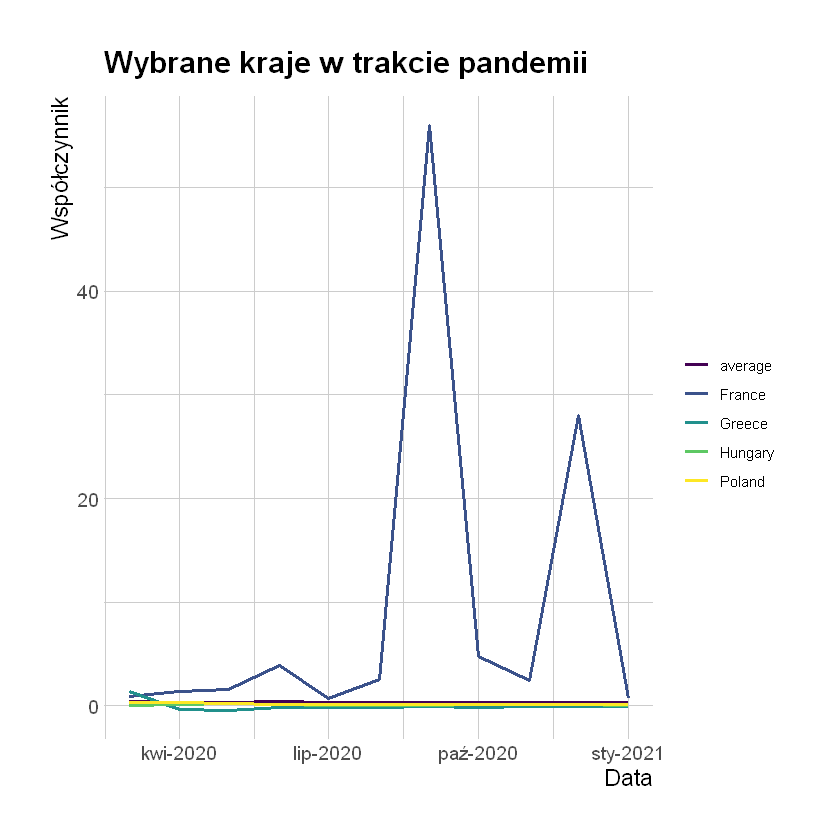

In [50]:
plot(picks_pandemic_data_tidy, "Wybrane kraje w trakcie pandemii", countries)

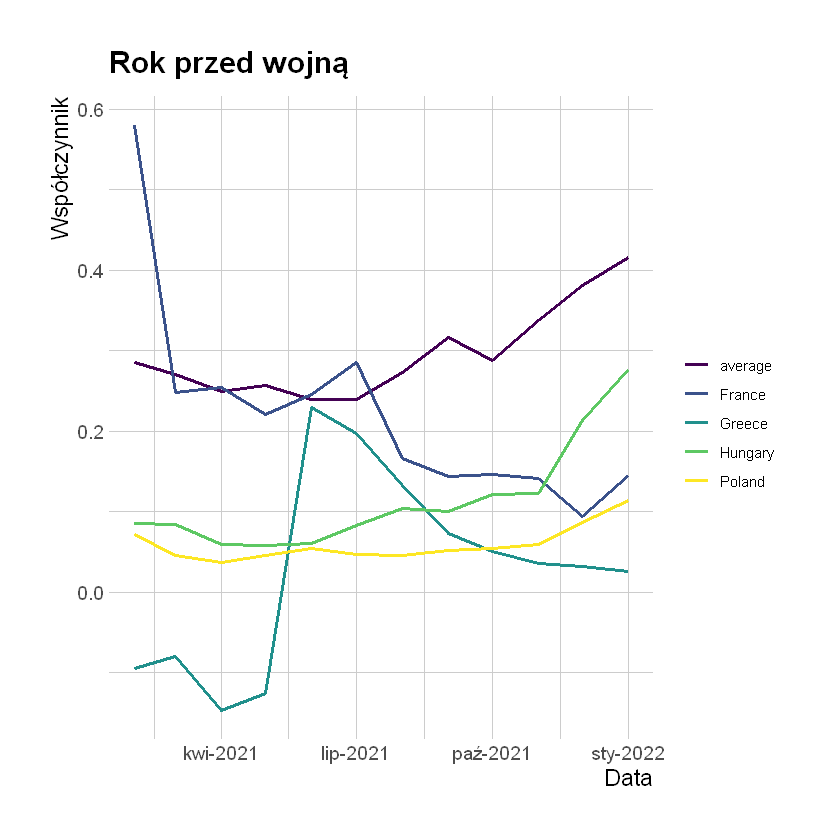

In [51]:
plot(picks_before_war_data_tidy, "Rok przed wojną", countries)

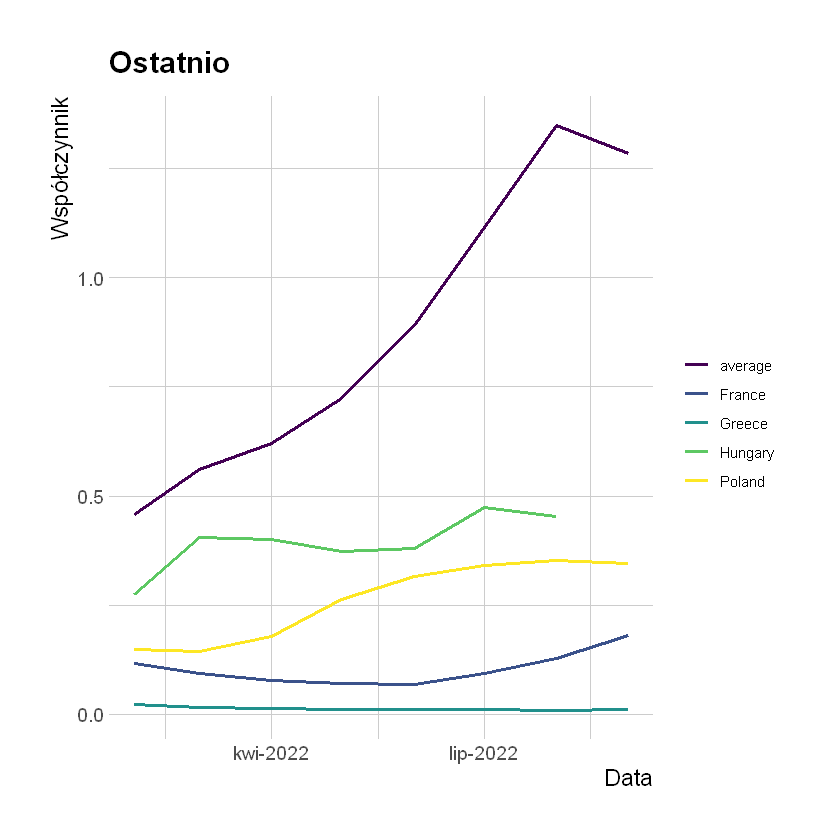

In [52]:
plot(picks_war_data_tidy, "Ostatnio", countries)